In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from collections import defaultdict
from tqdm.notebook import tqdm
import pandas as pd


Bad key "text.kerning_factor" on line 4 in
C:\Users\onomatopeia\.conda\envs\modelling-ncov2019\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import os
if os.getcwd().endswith('notebooks'):
    os.chdir(os.path.join(os.getcwd(), os.pardir))
# os.getcwd()

from bootstrapping.settings import data_dir

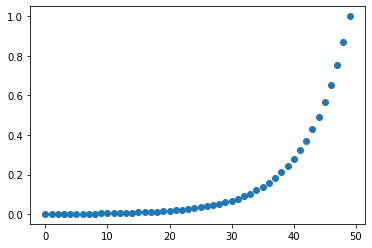

In [3]:
alphas = np.logspace(-10,0, base=2, num=50)
index = list(range(len(alphas)))
plt.plot(index, alphas, 'o')
plt.show()

In [4]:
alpha = 0.3
k = 2 # 1 < k < 15
rng = np.random.default_rng()
def compute_number_of_infected(alpha, k, rng=rng, x0=1):
    infected = np.zeros(k).astype(bool)
    sampled = np.zeros(k).astype(bool)
    infected[:x0] = 1
    while np.any(infected & ~sampled):
        arr = infected & ~sampled
        infecting_id = arr.nonzero()[0][0]
        sampled[infecting_id] = True
        probs = np.ones(k)
        probs[infecting_id] = 0
        probs /= (k - 1)
        infections = rng.binomial(k - 1, alpha)
        choices = rng.choice(k, infections, replace=False, p=probs)
        infected[choices] = True
    return sum(infected) - 1

In [5]:
def get_expected_of_alpha(alphas, output_file):
    iterations=5000

    expected = defaultdict(list)
    variances = defaultdict(list)
    print(f'k\talpha\texp. inf.\tvar. inf.\t(iterations={iterations})')
    for k in tqdm(np.arange(2, 15)):
        for alpha in alphas:
            expected_infected = 0
            var_infected = 0
            for iters in np.arange(iterations):
                infected = compute_number_of_infected(alpha, k)
                x_new = infected
                mean = expected_infected
                expected_infected = (expected_infected * iters + infected) / (iters + 1)
                new_mean = expected_infected

            expected[alpha].append(expected_infected)
    df = pd.DataFrame(data=expected, index=list(np.arange(2, 15)))
    df.index.name = 'k'
    df.to_csv(str(data_dir / output_file))
    return df

In [6]:
alphas = np.logspace(-10,0, base=2, num=50)
df = get_expected_of_alpha(alphas, 'mu_of_alpha_full_range.csv')

k	alpha	exp. inf.	var. inf.	(iterations=5000)


In [7]:
df

,0.000977,0.001125,0.001296,0.001493,0.001720,0.001981,0.002282,0.002629,0.003028,0.003488,...,0.279955,0.322495,0.371499,0.427949,0.492977,0.567886,0.654178,0.753582,0.868091,1.000000
k,,,,,,,,,,,,,,,,,,,,,
2,0.0006,0.0010,0.0012,0.0020,0.0018,0.0018,0.0016,0.0022,0.0026,0.0038,...,0.2746,0.3184,0.3838,0.4292,0.4890,0.5692,0.6590,0.7534,0.8750,1.0
3,0.0026,0.0032,0.0014,0.0036,0.0034,0.0046,0.0052,0.0058,0.0072,0.0084,...,0.6564,0.7802,0.9052,1.0650,1.2372,1.4006,1.5912,1.7884,1.9312,2.0
4,0.0016,0.0038,0.0058,0.0056,0.0066,0.0082,0.0072,0.0058,0.0108,0.0094,...,1.2028,1.4186,1.6880,1.9606,2.1968,2.5066,2.7350,2.8918,2.9872,3.0
5,0.0050,0.0050,0.0058,0.0078,0.0068,0.0098,0.0090,0.0110,0.0148,0.0124,...,1.8892,2.3038,2.6838,3.0536,3.3572,3.6754,3.8614,3.9618,3.9972,4.0
6,0.0046,0.0052,0.0052,0.0080,0.0050,0.0116,0.0114,0.0130,0.0178,0.0208,...,2.8206,3.3280,3.8424,4.2442,4.5910,4.8174,4.9382,4.9906,4.9990,5.0
7,0.0056,0.0076,0.0072,0.0126,0.0116,0.0106,0.0120,0.0154,0.0224,0.0256,...,3.9264,4.5446,5.0422,5.4596,5.7872,5.9208,5.9762,5.9962,6.0000,6.0
8,0.0056,0.0082,0.0098,0.0114,0.0122,0.0162,0.0170,0.0176,0.0210,0.0220,...,5.1716,5.8306,6.2702,6.6640,6.8690,6.9596,6.9926,6.9996,7.0000,7.0
9,0.0076,0.0112,0.0104,0.0118,0.0122,0.0164,0.0170,0.0256,0.0212,0.0296,...,6.5516,7.1232,7.5256,7.8062,7.9188,7.9816,7.9974,8.0000,8.0000,8.0
10,0.0096,0.0086,0.0096,0.0118,0.0154,0.0198,0.0214,0.0254,0.0266,0.0312,...,7.8086,8.3740,8.6990,8.8800,8.9592,8.9888,8.9996,9.0000,9.0000,9.0


In [ ]:
alphas = np.logspace(-10,-2, base=2, num=50)
get_expected_of_alpha(alphas, 'mu_of_alpha.csv')